In [1]:
import numpy as np

In [2]:
whist = np.loadtxt("rcv1_whistory")

In [3]:
whist.shape

(29, 47236)

In [4]:
from sklearn.datasets import load_svmlight_file
from scipy.sparse import csc_matrix

In [5]:
X_train, y_train = load_svmlight_file("data/rcv1_train.binary")

In [6]:
X_test, y_test = load_svmlight_file("data/rcv1_test.binary")

In [33]:
def accuracy_score_svm(w, X, y):
    return np.mean(((w @ X.T > 0) * 2 - 1) == y)

In [8]:
our_implementation = [
    accuracy_score_svm(np.zeros(X_test.shape[1]), X_test, y_test)
] + [
    accuracy_score_svm(w, X_test, y_test)
    for w in whist
]

In [50]:
from sklearn.svm import LinearSVC
import warnings
from time import time

warnings.filterwarnings("ignore") # intentional non-convergence

liblinear_times = []
liblinear_scores = []

for i in range(100):
    m = LinearSVC(C=1, max_iter=i, fit_intercept=False)
    start_time = time()
    m.fit(X_train, y_train)
    time_used = time() - start_time
    if m.n_iter_ < i:
        break
    liblinear_times.append(
        time_used
    )
    liblinear_scores.append(
        accuracy_score_svm(m.coef_, X_test, y_test)
    )

In [51]:
from sklearn.svm import SVC

libsvm_times = []
libsvm_scores = []

for i in range(200):
    print(i, end="\r")
    m = SVC(kernel="linear", C=1, max_iter=i)
    start_time = time()
    m.fit(X_train, y_train)
    time_used = time() - start_time
    if m.n_iter_ < i:
        break
    libsvm_times.append(
        time_used
    )
    libsvm_scores.append(
        accuracy_score_svm(m.coef_.todense(), X_test, y_test)
    )

In [55]:
import matplotlib.pyplot as plt

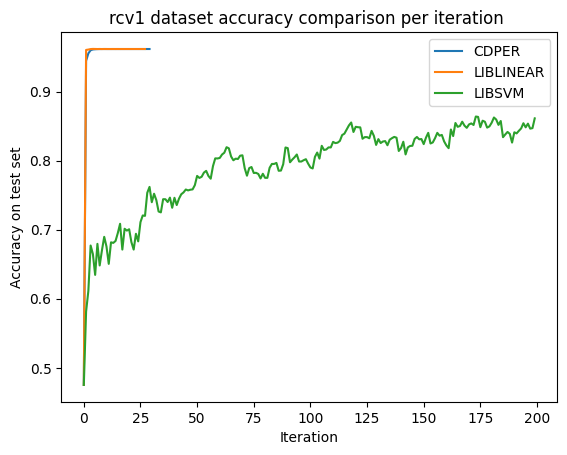

In [56]:
plt.plot(our_implementation)
plt.plot(liblinear_scores)
plt.plot(libsvm_scores)
plt.legend(["CDPER", "LIBLINEAR", "LIBSVM"])
plt.xlabel("Iteration")
plt.ylabel("Accuracy on test set")
plt.title("rcv1 dataset accuracy comparison per iteration ")
plt.show()

In [40]:
logs = """
2023-06-12T21:00:54.665493 0 20242.0
2023-06-12T21:04:01.251195 1 728.0645243857208
2023-06-12T21:07:18.189861 2 758.1292505994152
2023-06-12T21:10:32.713623 3 612.0639476185838
2023-06-12T21:13:44.580880 4 599.4775907609926
2023-06-12T21:16:58.781357 5 589.171114921943
2023-06-12T21:20:13.065183 6 588.0596584316478
2023-06-12T21:23:25.665744 7 584.5249959068337
2023-06-12T21:26:38.832688 8 584.2097136928863
2023-06-12T21:29:53.213671 9 583.3900005198487
2023-06-12T21:33:06.407988 10 583.0155375208578
2023-06-12T21:36:20.178784 11 582.6419915492356
2023-06-12T21:39:34.179719 12 582.519096834177
2023-06-12T21:42:48.100363 13 582.121376953983
2023-06-12T21:46:02.018516 14 582.0185038492718
2023-06-12T21:49:16.492075 15 581.9357730401446
2023-06-12T21:52:31.281680 16 581.8469929481539
2023-06-12T21:55:50.239617 17 581.7781216265732
2023-06-12T21:59:13.627676 18 581.7459350854983
2023-06-12T22:02:37.931087 19 581.7250302913664
2023-06-12T22:06:01.748413 20 581.6830372075522
2023-06-12T22:09:25.245103 21 581.6711179791532
2023-06-12T22:12:48.165682 22 581.6374439549465
2023-06-12T22:16:13.052525 23 581.6336291570474
2023-06-12T22:19:37.031491 24 581.6237060297343
2023-06-12T22:23:02.066737 25 581.6138091008598
2023-06-12T22:26:27.819619 26 581.6076851190585
2023-06-12T22:29:55.365915 27 581.6104173414213
2023-06-12T22:33:19.525415 28 581.6060418672741
"""
datetimes = [entry.split()[0] for entry in logs.split("\n")[1:-1]]

In [41]:
import datetime

In [42]:
ts = [
    datetime.datetime.fromisoformat(dt_str).timestamp()
    for dt_str in datetimes
]

In [46]:
our_times = (np.array(ts) - ts[0])
our_times

array([   0.        ,  186.58570194,  383.52436805,  578.04813004,
        769.91538692,  964.11586404, 1158.39968991, 1351.00025105,
       1544.16719508, 1738.54817796, 1931.74249506, 2125.51329088,
       2319.51422596, 2513.43487   , 2707.35302305, 2901.82658195,
       3096.6161871 , 3295.5741241 , 3498.962183  , 3703.26559401,
       3907.08292007, 4110.57960987, 4313.50018907, 4518.38703203,
       4722.36599803, 4927.40124393, 5133.15412593, 5340.70042205,
       5544.85992193])

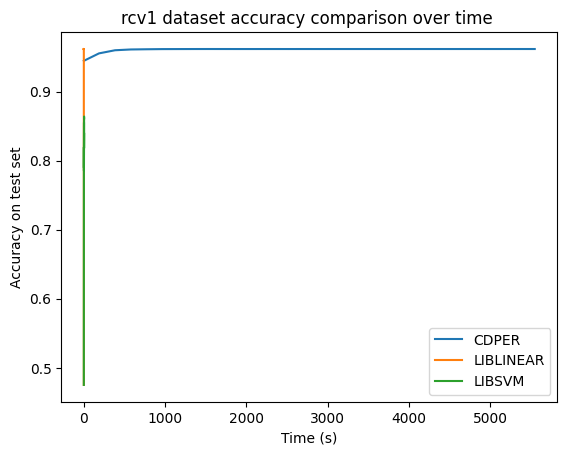

In [60]:
plt.plot(our_times, our_implementation[1:])
plt.plot(liblinear_times, liblinear_scores)
plt.plot(libsvm_times, libsvm_scores)
plt.legend(["CDPER", "LIBLINEAR", "LIBSVM"])
plt.xlabel("Time (s)")
plt.ylabel("Accuracy on test set")
plt.title("rcv1 dataset accuracy comparison over time ")
plt.show()